In [1]:
# Sampling Data for the interpolation
import numpy as np
import time

def generate_points(n: int) -> tuple[np.array, np.array]:
    x_n = np.arange(1, n+1)
    y_n = np.random.randint(1, 11, size=n)
    return x_n, y_n

x_n, y_n = generate_points(10)

# We also need to calculate the time it will take for each of the algorithms to run
lagrange_times = []
newton_times = []

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(x_n: np.array, y_n: np.array, x: float) -> float:
    y_interpolated = 0
    n = 10

    for k in range(n):
        # Compute L_k(x)
        L_k = 1
        for i in range(n):
            if i != k:
                L_k *= (x - x_n[i]) / (x_n[k] - x_n[i])

        # Multiply L_k(x) by y_k and sum
        y_interpolated += y_n[k] * L_k

    return y_interpolated

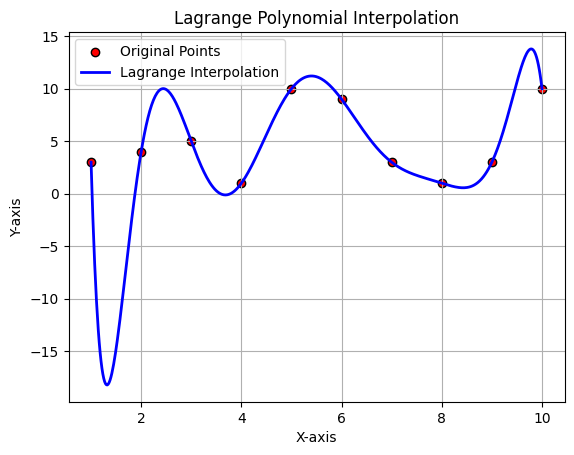

In [3]:
# Now we need to draw the points and see if they are interpolated
import matplotlib.pyplot as plt

def plot_lagrange_interpolation(x_n: np.array, y_n: np.array, n_generate) -> None:
    # Sort points by x
    # Generate smooth curve
    x_smooth = np.linspace(min(x_n), max(x_n), n_generate)
    y_smooth = [lagrange_interpolation(x_n, y_n, x) for x in x_smooth]

    # Plot original points
    plt.scatter(x_n, y_n, color='red', marker='o', edgecolors='black', label="Original Points")

    # Plot interpolated curve
    plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', linewidth=2, label="Lagrange Interpolation")

    # Labels and grid
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Lagrange Polynomial Interpolation")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_lagrange_interpolation(x_n, y_n, 500)

In [4]:
# Now we need to make newton's interpolation
import numpy as np
import matplotlib.pyplot as plt

import numpy as np

def compute_divided_differences(x_n: np.array, y_n: np.array):
    num_points = 10
    coef = np.zeros((num_points, num_points))
    coef[:, 0] = y_n  # First column is just the y values

    for j in range(1, num_points):
        for i in range(num_points - j):
            coef[i][j] = (coef[i+1][j-1] - coef[i][j-1]) / (x_n[i+j] - x_n[i])
    return coef

coef = compute_divided_differences(x_n, y_n)

def newton_interpolation(x_n: np.array, x: float):
    num_points = 10
    interpolated_y = coef[0, 0]
    product_term = 1.0

    for i in range(1, num_points):
        product_term *= (x - x_n[i-1])
        interpolated_y += coef[0, i] * product_term

    return interpolated_y

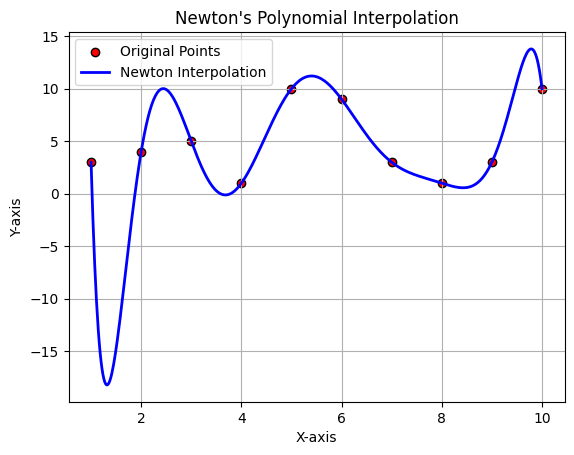

In [5]:
import matplotlib.pyplot as plt

def plot_newton_interpolation(x_n: np.array, y_n: np.array, n_generate) -> None:
    # Generate smooth curve
    x_smooth = np.linspace(min(x_n), max(x_n), n_generate)
    y_smooth = [newton_interpolation(x_n, x) for x in x_smooth]

    # Plot original points
    plt.scatter(x_n, y_n, color='red', marker='o', edgecolors='black', label="Original Points")

    # Plot interpolated curve
    plt.plot(x_smooth, y_smooth, color='blue', linestyle='-', linewidth=2, label="Newton Interpolation")

    # Labels and grid
    plt.xlabel("X-axis")
    plt.ylabel("Y-axis")
    plt.title("Newton's Polynomial Interpolation")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_newton_interpolation(x_n, y_n, 500)

In [6]:
# Define a function that runs the interpolation and return the time it takes till ending the calculation
def run_estimate_time(interpolation: str, ns):
    times = []  # Store times locally to prevent duplicates
    for n in ns:
        x_test = np.linspace(min(x_n), max(x_n), n)  # Generate test points
        start_time = time.time()
        if interpolation == "newton":
            _ = [newton_interpolation(x_n, x) for x in x_test]
        else:
            _ = [lagrange_interpolation(x_n, y_n, x) for x in x_test]
        end_time = time.time()
        times.append(end_time - start_time)  # Append only once

    # Assign to the correct list
    if interpolation == "newton":
        global newton_times
        newton_times = times  # Avoid appending multiple times
    else:
        global lagrange_times
        lagrange_times = times


In [7]:
ns = [1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

In [8]:
def plot_times(ns):
    plt.plot(ns, newton_times, marker='o', linestyle='-', label="Newton's Interpolation Method", color='blue')
    plt.plot(ns, lagrange_times, marker='s', linestyle='--', label="Lagrange's Interpolation Method", color='red')

    # Labels and title
    plt.xlabel("Test Case Number")
    plt.ylabel("Execution Time (seconds)")
    plt.title("Algorithm Performance Comparison")
    plt.legend()  # Show legend
    plt.grid(True)  # Add grid for better readability

    # Show the plot
    plt.show()


In [9]:
# Now Run the algorithms and calculate time
run_estimate_time("newton", ns)

In [10]:
run_estimate_time("lagrange", ns)

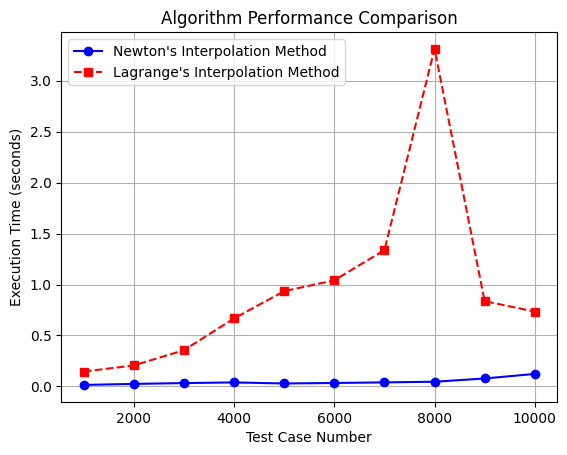

In [11]:
plot_times(ns)